In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# function to clean column names
def clear_cols(s):
    return s.strip().replace(" ","_")

# load data
path = '../Healthcare Provider Fraud Detection Analysis/Train-1542865627584.csv'
df = pd.read_csv(path).rename(columns=clear_cols)


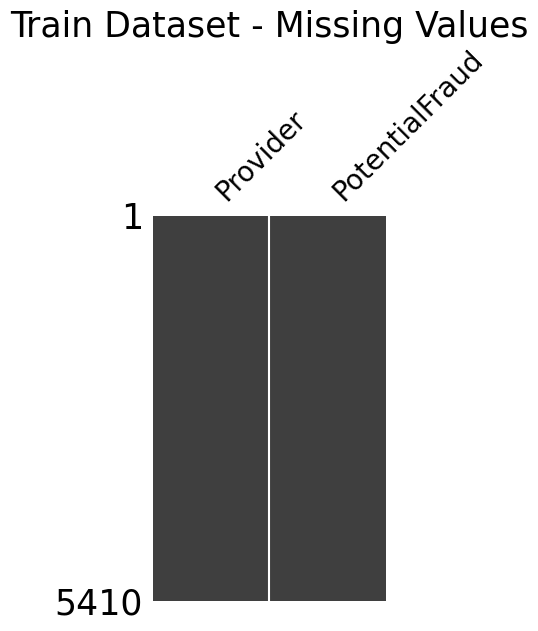

In [3]:
# plt.figure(figsize=(3,5))
msno.matrix(df, sparkline=False, fontsize=20,figsize=(3,5))
plt.title('Train Dataset - Missing Values', fontsize=25)
plt.show()

In [4]:
print(f"Shape of the file: {df.shape}")
df.head()

Shape of the file: (5410, 2)


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [5]:
print(f"duplicates -> {df.duplicated().sum()}\n")
print(f"null values: \n{df.isnull().sum()}")

duplicates -> 0

null values: 
Provider          0
PotentialFraud    0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [7]:
df['PotentialFraud'].value_counts()

PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64

In [8]:
# presentage of missing values
df.isna().sum()/len(df) *100

Provider          0.0
PotentialFraud    0.0
dtype: float64

In [9]:
df['Provider'].nunique()

5410

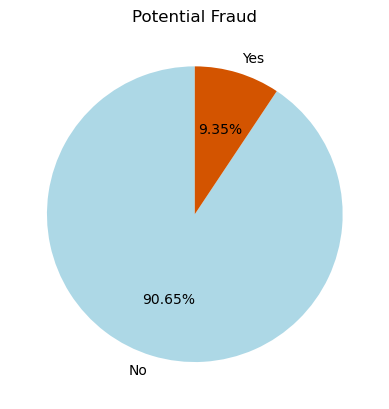

In [10]:
plt.pie(df['PotentialFraud'].value_counts(), 
        labels=['No','Yes'], 
        autopct='%1.2f%%',
        startangle=90,
        colors=['lightblue','#d35400'])
plt.title('Potential Fraud')
plt.show()

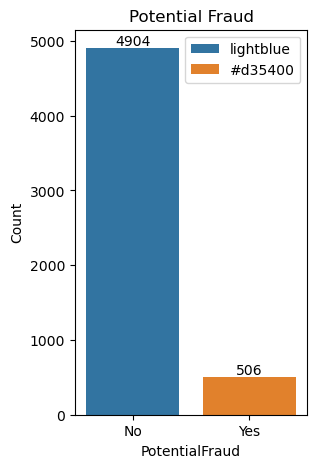

In [11]:
# plot the difference between the fraud and non-fraud providers
fraud_counts = df['PotentialFraud'].value_counts()
fraud_data = pd.DataFrame({'PotentialFraud': fraud_counts.index, 'Count': fraud_counts.values})

colors = ['lightblue', '#d35400']
# Create the bar plot
plt.figure(figsize=(3, 5))
ax = sns.barplot(data=fraud_data, x='PotentialFraud', y='Count', hue=colors)

# Add labels to bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Potential Fraud')
plt.show()

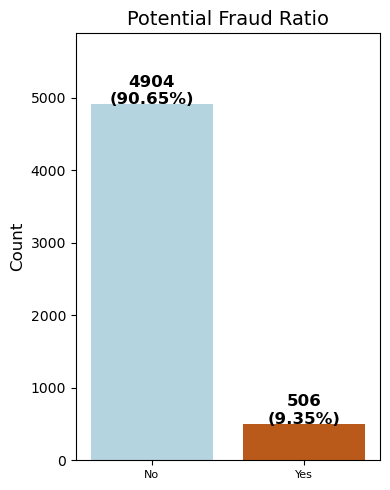

In [12]:
# Count occurrences of 'Yes' and 'No'
counts = df['PotentialFraud'].value_counts()
total = counts.sum()  # Total count of all values

# Define colors
color_map = {'Yes': '#d35400', 'No': 'lightblue'}

# Create bar plot
plt.figure(figsize=(4, 5))
ax = sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette=color_map, legend=False)

# Add count and percentage annotations
for i, value in enumerate(counts.values):
    percentage = f"{(value / total) * 100:.2f}%"
    ax.text(i, value + 0.5, f"{value}\n({percentage})", ha='center', fontsize=12, fontweight='bold')

# Customize the plot
plt.title("Potential Fraud Ratio", fontsize=14)
plt.xlabel("")  # No x-axis label needed
plt.ylabel("Count", fontsize=12)
plt.ylim(0, max(counts.values) * 1.2)  # Add some padding above bars
plt.xticks(fontsize=8)
plt.tight_layout()
# Show plot
plt.show()

In [13]:
df.loc[df['Provider'] == 'PRV51001']

,Provider,PotentialFraud
0,PRV51001,No


In [14]:
df.value_counts()

Provider  PotentialFraud
PRV51001  No                1
PRV55516  No                1
PRV55527  No                1
PRV55525  No                1
PRV55523  No                1
                           ..
PRV53246  No                1
PRV53245  Yes               1
PRV53244  No                1
PRV53243  No                1
PRV57763  No                1
Name: count, Length: 5410, dtype: int64

### We have about 90% not predicted as fraud providers,
### And 10% of predicted as Frauds in the dataset

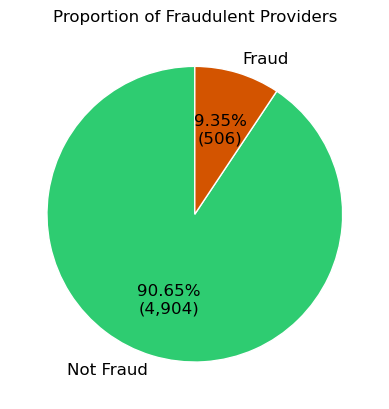

In [27]:
values = df['PotentialFraud'].value_counts()

fig, ax = plt.subplots()
def make_autopct(values):
    """
    Returns a function that computes both the 
    percentage and the raw value for a pie slice.
    """
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f"{pct:.2f}%\n({val:,})"
    return my_autopct

# fig.patch.set_facecolor('lightgray')
# ax.set_facecolor('lightgray')
ax.pie(
    values,
    labels=['Not Fraud', 'Fraud'],
    autopct=make_autopct(values),  # custom autopct
    startangle=90,
    wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },
    colors=['#2ecc71','#d35400'],  # Custom colors
    textprops={'fontsize': 12}  # Control font size and more
)
plt.title('Proportion of Fraudulent Providers')
# ax.legend()
plt.show()